Bitirme projesi

Nelere bakılması gerekiyor

1. Ülkelere göre günlük vaka sayısı.
2. Ülkelere göre ortalama vaka sayısı.
3. Ülkelere göre toplam aşılama sayısı.
4. Günlük ortalama vaka sayısı.
5. 65 yaşından büyük vakaların toplamı.

In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("covid-data.csv", engine='python') # Dosyayı okuma engine='python'

df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232794,ZWE,Africa,Zimbabwe,2022-11-01,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232795,ZWE,Africa,Zimbabwe,2022-11-02,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232796,ZWE,Africa,Zimbabwe,2022-11-03,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232797,ZWE,Africa,Zimbabwe,2022-11-04,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [4]:
df.info() #Veri setimizi inceliyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232799 entries, 0 to 232798
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    232799 non-null  object 
 1   continent                                   219658 non-null  object 
 2   location                                    232799 non-null  object 
 3   date                                        232799 non-null  object 
 4   total_cases                                 219693 non-null  float64
 5   new_cases                                   219395 non-null  float64
 6   new_cases_smoothed                          218199 non-null  float64
 7   total_deaths                                200445 non-null  float64
 8   new_deaths                                  200370 non-null  float64
 9   new_deaths_smoothed                         199190 non-null  float64
 

In [5]:
df["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswat

In [6]:
df.dtypes #Veri tipleri inceliyorum.

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [7]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,219693.0,4.532789e+06,2.828932e+07,1.000000,4548.000000,5.053000e+04,5.336100e+05,6.323342e+08
new_cases,219395.0,1.229695e+04,8.483903e+04,0.000000,0.000000,5.200000e+01,9.430000e+02,4.081969e+06
new_cases_smoothed,218199.0,1.233905e+04,8.290994e+04,0.000000,5.857000,9.200000e+01,1.114642e+03,3.436034e+06
total_deaths,200445.0,7.466858e+04,3.835594e+05,1.000000,114.000000,1.199000e+03,9.903000e+03,6.599916e+06
new_deaths,200370.0,1.368085e+02,7.250577e+02,0.000000,0.000000,1.000000e+00,1.400000e+01,1.773100e+04
...,...,...,...,...,...,...,...,...
population,231796.0,1.413489e+08,6.938080e+08,47.000000,896007.000000,6.948395e+06,3.369661e+07,7.975105e+09
excess_mortality_cumulative_absolute,7766.0,4.796967e+04,1.325850e+05,-37726.100000,34.600000,6.009500e+03,3.471957e+04,1.224011e+06
excess_mortality_cumulative,7766.0,9.963914e+00,1.354155e+01,-28.450000,0.560000,7.385000e+00,1.560750e+01,7.655000e+01
excess_mortality,7817.0,1.432574e+01,2.639061e+01,-95.920000,-0.120000,7.270000e+00,1.977000e+01,3.765800e+02


In [8]:
df.columns #Sütün isimlerini inceliyorum.

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [9]:
df.isnull() #Null olan değerleri inceliyorum.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232794,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
232795,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
232796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
232797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [10]:
df.shape

(232799, 67)

In [11]:
df.isnull().sum().sum() #Tüm boş değerlerin toplam sayısı

7109550

In [12]:
eksik_deger = df.isnull().sum() 
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232794,ZWE,Africa,Zimbabwe,2022-11-01,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232795,ZWE,Africa,Zimbabwe,2022-11-02,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232796,ZWE,Africa,Zimbabwe,2022-11-03,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232797,ZWE,Africa,Zimbabwe,2022-11-04,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


**Veri Temizleme**

In [119]:
#Eksik değer tablosu
df = pd.read_csv("covid-data.csv", engine='python') # Dosyayı okuma 

def eksik_deger_tablosu(df): 
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son

eksik_deger_tablosu(df)


,Eksik Değerler,% Değeri
iso_code,0,0.000000
continent,13141,5.644784
location,0,0.000000
date,0,0.000000
total_cases,13106,5.629749
...,...,...
population,1003,0.430844
excess_mortality_cumulative_absolute,225033,96.664075
excess_mortality_cumulative,225033,96.664075
excess_mortality,224982,96.642168


In [113]:
#Verileri incelediğimde World isimli bir ülke girilmiş. Bu yanlış bir değer olduğu için World veri setimden çıkartıyorum.
df = pd.read_csv("covid-data.csv", engine="python")
data = df.set_index("location")
df = data.drop("World", axis=0 )


**1. Ülkelere göre günlük vaka sayısı.**

In [25]:
#Yapılması gerekenler 
#Son olarakta ülke, tarih, günlük vaka sayısını gösteririz.
#Aynı zamanda verimde new_cases_smoothed düzeltilmiş değerler adında bir sütünüm var bu sütünde var.
# Bu sebeple eğer  new_cases_smoothed değer varsa orayı alması gerekir.



for i in df["new_cases_smoothed"]:
    if i > 0:
        new_cases = df["new_cases_smoothed"] 
      
    else:
        new_cases =df["new_cases"]
   
df = pd.read_csv("covid-data.csv", usecols=[ "location", "date", "new_cases" ], engine="python")

df.head()

,location,date,new_cases
0,Afghanistan,2020-02-24,5.0
1,Afghanistan,2020-02-25,0.0
2,Afghanistan,2020-02-26,0.0
3,Afghanistan,2020-02-27,0.0
4,Afghanistan,2020-02-28,0.0


**2.Ülkelere göre ortalama vaka sayısı.**

In [97]:
#Ülke bazında groupby yaparak yeni değerleri ekliyorum.
df.groupby("location")["new_cases"].agg(["count", "max", "mean"])

,count,max,mean
location,,,
Afghanistan,984,3243.0,206.892276
Africa,997,60523.0,12410.981946
Albania,972,4789.0,342.639918
Algeria,985,2521.0,274.986802
Andorra,979,2313.0,47.587334
...,...,...,...
Wallis and Futuna,748,2654.0,4.565508
Western Sahara,0,NaN,NaN
Yemen,939,287.0,12.722045


**3. Ülkelere göre toplam aşılama sayısı.**

In [98]:
df = pd.read_csv("covid-data.csv", engine="python")
data = df.set_index("location")
df = data.drop("World", axis=0)
df.groupby("location")["people_vaccinated"].sum()

location
Afghanistan          3.720677e+08
Africa               1.184061e+11
Albania              1.788674e+08
Algeria              1.595409e+08
Andorra              2.066005e+06
                         ...     
Wallis and Futuna    1.990060e+05
Western Sahara       0.000000e+00
Yemen                1.809819e+07
Zambia               4.173752e+07
Zimbabwe             1.797750e+09
Name: people_vaccinated, Length: 247, dtype: float64

**4. Günlük ortalama vaka sayısı.**

In [100]:
df = pd.read_csv("covid-data.csv", engine='python') # Dosyayı okuma engine='python'

df["new_cases"].fillna( value=0 , inplace=True)

df
df.groupby("date")["new_cases"].mean()

date
2020-01-01       0.000000
2020-01-02       0.000000
2020-01-03       0.000000
2020-01-04       0.000000
2020-01-05       0.000000
                 ...     
2022-11-01    7031.787879
2022-11-02    7373.121212
2022-11-03    8703.722944
2022-11-04    8288.722944
2022-11-05    3499.774892
Name: new_cases, Length: 1040, dtype: float64

**5. 65 yaşından büyük vakaların toplamı.**

In [50]:
aged_65_sum = df["aged_65_older"].sum()+ df["aged_70_older"].sum() 
print(f" 65 yaşından büyük vakaların toplamı : {aged_65_sum} ")

 65 yaşından büyük vakaların toplamı : 2676555.0030000005 


**COVİD VERİSİNİN GÖRSELLEŞTİRMESİ**

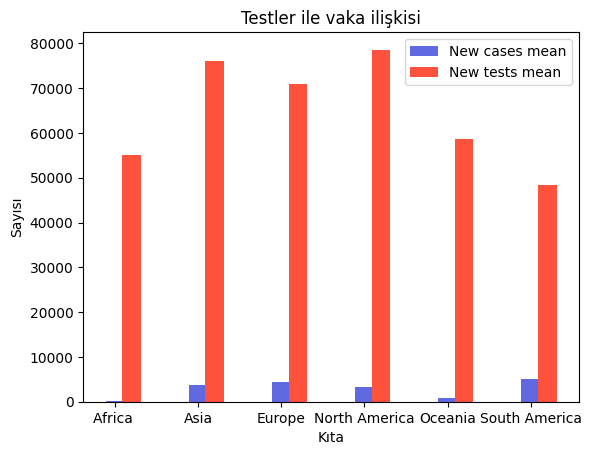

In [103]:
#Bu görselleştirmede africa kıtasının oranın düşüklüğü saptadım.
#Bu düşüklüğün test sayısıyla ilgi bir bağlantısı var mı? diye merak ettim.
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Africa ','Asia','Europe',"North America", "Oceania", "South America"]
  
X_axis = np.arange(len(X))

df["new_tests"].fillna(df["new_tests"].mean(), inplace=True)
df["new_cases"].fillna(df["new_cases"].mean(), inplace=True)
  

plt.bar(X_axis , df.groupby("continent")["new_cases"].mean(), width = 0.225, color = '#6169E1', label ="New cases mean")
plt.bar(X_axis + 0.2, df.groupby("continent")["new_tests"].mean(), width = 0.225, color = '#FF523C', label = 'New tests mean')
  
plt.xticks(X_axis, X)
plt.xlabel("Kıta")
plt.ylabel("Sayısı")
plt.title("Testler ile vaka ilişkisi")
plt.legend()
plt.show()

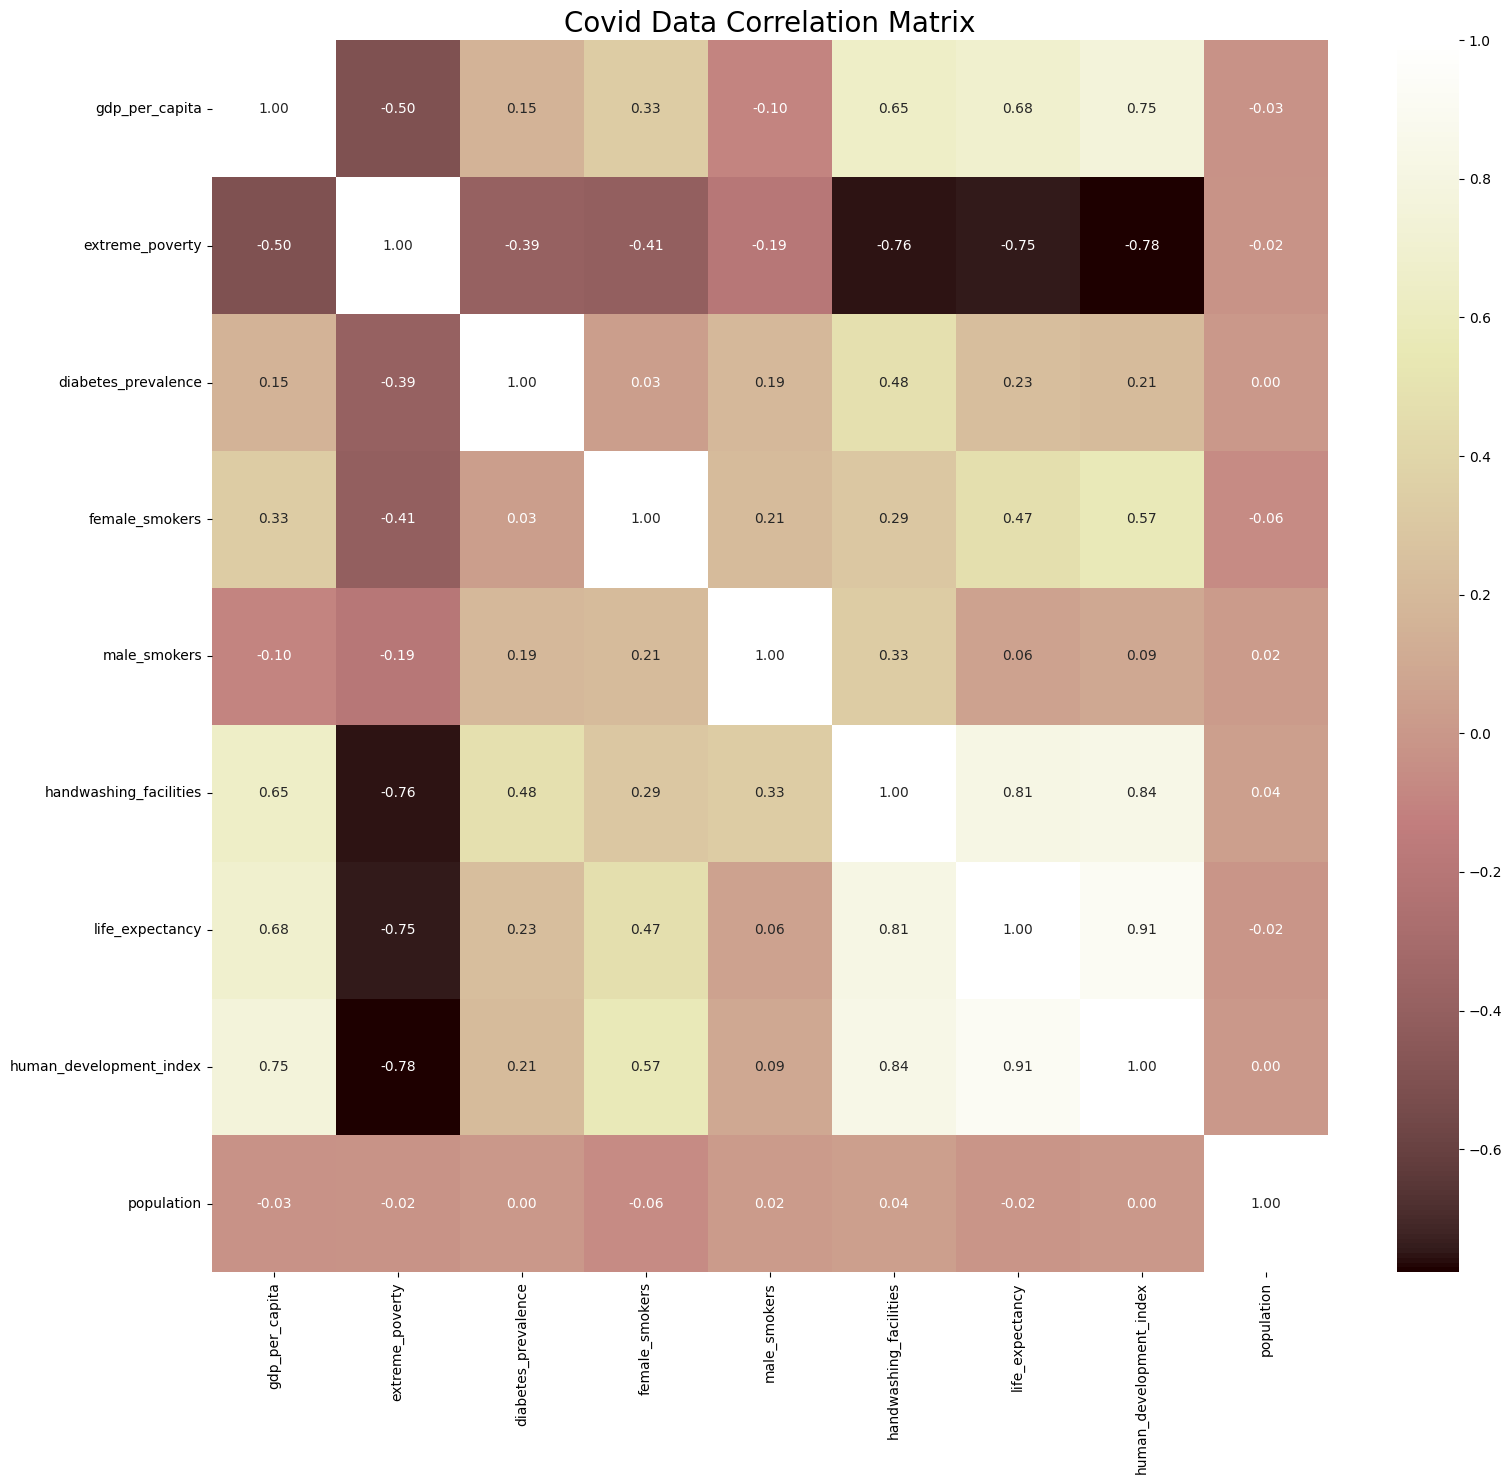

In [107]:

num_cols1 = ['gdp_per_capita', 'extreme_poverty',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'life_expectancy', 'human_development_index', 'population']
df[num_cols1].corr()

f, ax = plt.subplots(figsize=[18, 16])
sns.heatmap(df[num_cols1].corr(), annot=True, fmt=".2f", ax=ax, cmap="pink")
ax.set_title("Covid Data Correlation Matrix", fontsize=20)
plt.show()

 65 yaşından büyük vakaların toplamı : 2676555.0030000005 
 65 yaşından küçük vakaların toplamı : 2699526629.873 


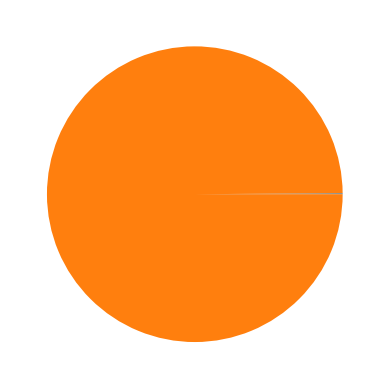

In [101]:
aged_65_sum = df["aged_65_older"].sum()+ df["aged_70_older"].sum() 
print(f" 65 yaşından büyük vakaların toplamı : {aged_65_sum} ")
all_case = df["new_cases"].sum() - - df["aged_65_older"].sum()
print(f" 65 yaşından küçük vakaların toplamı : {all_case} ")

y = [aged_65_sum, all_case]

plt.pie(y)
plt.show() 


C:\Users\senas\AppData\Local\Temp\ipykernel_35476\1713235307.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = data1.groupby('date').sum()


Text(0, 0.5, 'Yeni Vaka')

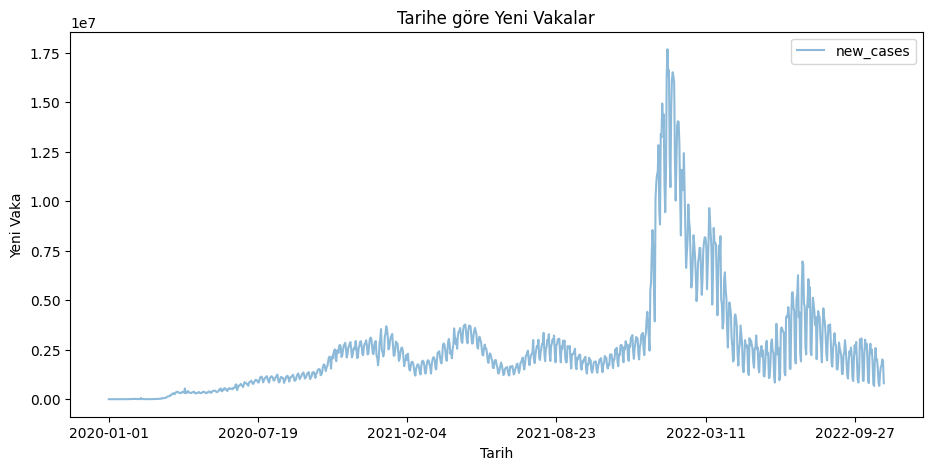

In [102]:
data1 = df.copy()

data1 = data1.groupby('date').sum()

data1['new cases'] = data1['new_cases'].mean()

data1[['new_cases']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Tarihe göre Yeni Vakalar')
plt.xlabel('Tarih')
plt.ylabel('Yeni Vaka')

<AxesSubplot: xlabel='continent'>

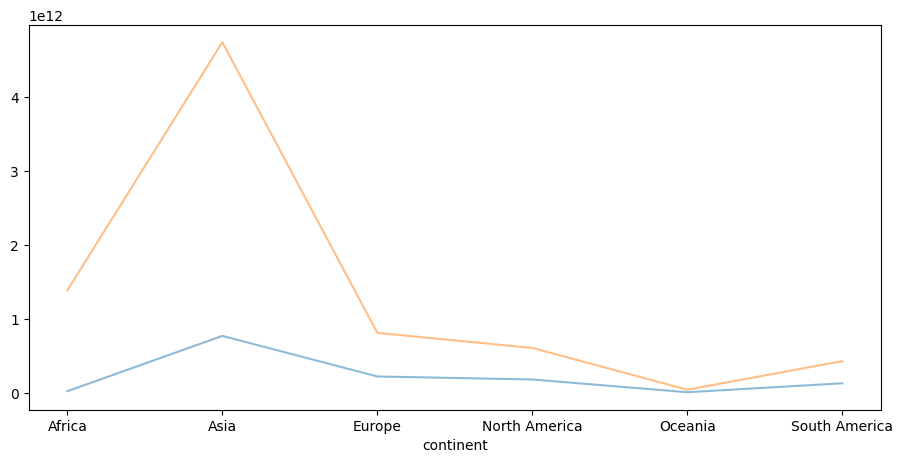

In [19]:
#Kıtalara göre 
df.groupby("continent")["people_vaccinated"].sum().plot(figsize = (11, 5), alpha = 0.5)
df.groupby("continent")["population"].sum().plot(figsize = (11, 5), alpha = 0.5)

In [90]:
df["reproduction_rate"].isnull().sum() #Üreme hızı oranı

61232

In [108]:
df["reproduction_rate"].fillna(df["reproduction_rate"].mean(), inplace=True)
df["reproduction_rate"].isnull().sum()

0

<AxesSubplot: xlabel='date'>

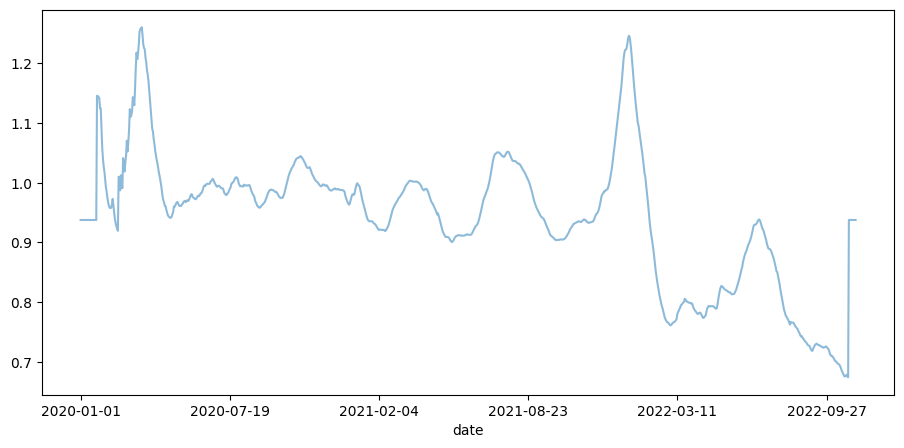

In [111]:
#Üreme Oranı
df.groupby("date")['reproduction_rate'].mean().plot(figsize = (11, 5), alpha = 0.5)